# Tutorial 2: Time series

## Data I/O and analysis
Read, display and analize book data. 

The data file for the exercise was obtained in http://ourworldindata.com. 

It is available at https://github.com/wbandabarragan/physics-teaching-data/blob/main/1D-data/new-books-per-million.csv.

### Activities to do:

Write Python functions that: 

(a) Read in the **new-books-per-million.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.


(b) Create 3 new data objects (time series) that contain only the information (rows) for the 3 countries with most entries.


(c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years.


(d) Calculate the average and standard deviation of the annual number of books per million people of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- Books per million people in each (three different arrays)

- Average of books (of these 3 countries)

- Standard deviation of books (of these 3 countries)

### (a) Read in the **new-books-per-million.csv** file, and place the data into a pandas dataframe. Inspect the data tables to check how they are organised.

In [1]:
# Import the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Function
def read_file(path):
    """
    Reads a file given the filename.
    """
    return pd.read_csv(path)

In [3]:
# Give the path
path = './Data/new-books-per-million.csv'

# And call the function
dataframe = read_file(path)

# Inspection
dataframe.head(10)

,Entity,Code,Year,Book titles per capita (Fink-Jensen 2015)
0,Algeria,DZA,1953,10.596210
1,Algeria,DZA,1954,8.115622
2,Algeria,DZA,1963,12.596606
3,Algeria,DZA,1964,13.605609
4,Algeria,DZA,1965,10.950347
5,Algeria,DZA,1966,15.884413
6,Algeria,DZA,1967,20.218645
7,Algeria,DZA,1968,21.983427
8,Algeria,DZA,1979,14.097694
9,Algeria,DZA,1980,14.622945


### (b) Create 3 new data objects (time series) that contain only the information for the 3 countries with most entries.

#### Count the countries with most entries

In [4]:
# To choose appropiate countries, we have to count how many times they appear
entity = dataframe['Entity']
print(entity)

0          Algeria
1          Algeria
2          Algeria
3          Algeria
4          Algeria
           ...    
8307    Yugoslavia
8308    Yugoslavia
8309    Yugoslavia
8310    Yugoslavia
8311    Yugoslavia
Name: Entity, Length: 8312, dtype: object


In [5]:
# Now let's see which ones appear the most with the following function
def count_elements(array, k):
    """
    Counts all the repetitions of elements in an array, puts them in a dictionary
    and returns the k with most repetitions. 
    """
    # Create a dictionary
    count = {}
     
    # And run this simple loop to count the elements
    for element in array:
        if element in count:
            count[element] = count[element] + 1
        else:
            count[element] = 1

    # Split the dictionary
    countries = np.array(list(count.keys()))
    values = np.array(list(count.values()))

    # Identity the k max coeffiecients
    indexes = np.argsort(values)[-k:]

    # Take the k max values and countries
    three_countries = countries[indexes]
    three_values = values[indexes]
    
    return three_countries, three_values

In [6]:
# Let's use it!
print(count_elements(entity, 3))

(array(['United Kingdom', 'Netherlands', 'Sweden'], dtype='<U20'), array([509, 510, 510]))


The countries with most entries are the Netherlands, the UK and Sweden.

#### Selecting the data for those three countries

In [7]:
# Funtion
def slice_data(dataset, country_name):
    """
    Slices data by country name.
    """
    # Simply
    country_data = dataset[dataset['Entity'] == country_name]

    return country_data

In [8]:
# Country data
nether_data = slice_data(dataframe, 'Netherlands')
uk_data = slice_data(dataframe, 'United Kingdom')
sweden_data = slice_data(dataframe, 'Sweden')

In [9]:
# Let's verify it
np.unique(uk_data['Entity'])

array(['United Kingdom'], dtype=object)

### (c) Inspect the data, compare the time ranges (in years), and adjust the data series (if necessary) so that each object/series contains information for the same number of years.

#### Checking if everything is right (Spoiler: It's not!)

In [10]:
# Before continuing, check the shapes of each
print(nether_data.shape, uk_data.shape, sweden_data.shape)

(510, 4) (509, 4) (510, 4)


This is a problem!

In [11]:
# Check the mins and maxs
print(nether_data.min().iloc[2], nether_data.max().iloc[2])
print(uk_data.min().iloc[2], uk_data.max().iloc[2])
print(sweden_data.min().iloc[2], sweden_data.max().iloc[2])

1500 2009
1500 2009
1500 2009


What do you think? How can we find that missing element and its position?

In [12]:
# Get the year UK array
uk_years = np.array(uk_data.iloc[:,2])
print(uk_years)

[1500 1501 1502 1503 1504 1505 1506 1507 1508 1509 1510 1511 1512 1513
 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523 1524 1525 1526 1527
 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537 1538 1539 1540 1541
 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555
 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569
 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 1582 1583
 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597
 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611
 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625
 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639
 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653
 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667
 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681
 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695
 1696 

In [13]:
# Create a convenient array
convenient_array = np.linspace(uk_years[0]+1, uk_years[-1], len(uk_years))

# And get the difference
diff_array = convenient_array - uk_years

print(diff_array)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [14]:
# Find the index of the first 0
index_0 = diff_array.tolist().index(0)

print(f'The index of the element is {index_0}.')

The index of the element is 483.


In [15]:
# Use the found coefficient
print(uk_years[index_0-1], uk_years[index_0])

1982 1984


#### Cleaning the data

In [16]:
# Change the arrays
def clean_data(data):
    """
    Removes data from 1983.
    """
    # Simply
    return data[data['Year'] != 1983]

In [17]:
# Call the function
nether_data = clean_data(nether_data)
sweden_data = clean_data(sweden_data)

In [18]:
# Veryfy the shapes
print(nether_data.shape, uk_data.shape, sweden_data.shape)

(509, 4) (509, 4) (509, 4)


In [19]:
# Now we're in position of selecting the arrays
def select_array(dataset, key):
    """
    Selects arrays of clean data.
    """
    return np.array(dataset[key])

In [20]:
# Get the year array
year_array = select_array(nether_data, 'Year')

In [21]:
# And the books title per capita
books_name = 'Book titles per capita (Fink-Jensen 2015)'

nether_books = select_array(nether_data, books_name )
uk_books = select_array(uk_data, books_name)
sweden_books = select_array(sweden_data, books_name)

In [22]:
# Verify
print(nether_books.shape, uk_books.shape, sweden_books.shape, year_array.shape)

(509,) (509,) (509,) (509,)


### (d) Calculate the average and standard deviation of the annual number of books per million people of these 3 countries. Create and export (in CSV format) a new pandas data frame that contains 6 columns:

- Year

- Books per million people in each (three different arrays)

- Average of books (of these 3 countries)

- Standard deviation of books (of these 3 countries)

#### Computation

In [23]:
# Define a function to compute the average and the standard deviation.
def compute_quantities(*array):
    """
    Computes the mean and std of arrays by getting a matrix
    where these arrays are rows.
    """
    # Get the arrays together
    data_together = np.array(array)

    # Compute the quantities
    # Mean:
    mean = np.mean(data_together, axis = 0)

    # Standard deviation
    std = np.std(data_together, axis = 0)
    
    return mean, std, data_together

In [24]:
# Call the function
mean_array, std_array, data_together = compute_quantities(nether_books, uk_books, sweden_books)

In [25]:
# Verfy the shape
data_together.shape

(3, 509)

#### CSV export with pandas

In [26]:
# Create a pandas frame with a dictionary inside
books_df = pd.DataFrame({"Time [Years]": year_array, 
                      "Netherlands [#Books/1M People]": nether_books, 
                      "UK [#Books/1M People]": uk_books,
                      "Sweden [#Books/1M People]": sweden_books, 
                      "Average [#Books/1M People]": mean_array,
                      "Standard Dev [#Books/1M People]": std_array})
# Let's see the type
type(books_df)

pandas.core.frame.DataFrame

In [27]:
# And get it as a csv file
books_df.to_csv('./Data/books_df.csv', float_format='{:.4e}'.format, index = False)

#### Plot!

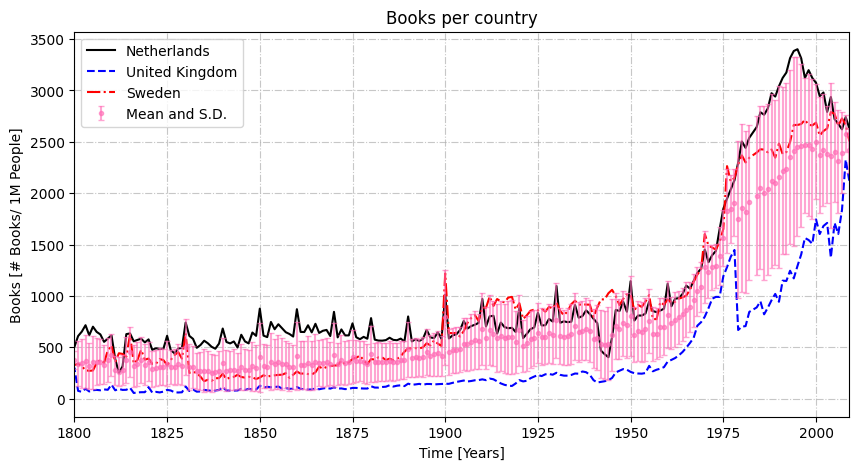

In [28]:
# Plot
plt.figure(figsize=(10,5))

plt.title('Books per country')
plt.xlabel('Time [Years]')
plt.ylabel('Books [# Books/ 1M People]')

plt.plot(year_array, nether_books, color = "k", label = 'Netherlands', linestyle = '-')
plt.plot(year_array, uk_books, color = "b", label = 'United Kingdom', linestyle = '--')
plt.plot(year_array, sweden_books, color = "r", label = 'Sweden', linestyle = '-.')

# Mean and stv
plt.errorbar(year_array, mean_array, yerr = std_array, color = 'hotpink', capsize = 2,
            alpha = 0.6, label = 'Mean and S.D.', fmt = '.')

plt.grid(linestyle = '-.', alpha = 0.7)

plt.legend()
plt.xlim(1800, 2009)
plt.show()
plt.close()

### Brief regression

In [29]:
# Library
import scipy.optimize as opt

In [30]:
# Define the model
def quadratic_model(year_array, a, b, c):
    return a*year_array**2+b*year_array+c

In [31]:
# Call the function to use
coef, cova = opt.curve_fit(quadratic_model, year_array, mean_array, sigma = std_array)

In [32]:
# Good array
year_array_2 = np.linspace(year_array[0], year_array[-1], 1000)

# Model
fit_array = quadratic_model(year_array_2, *coef)

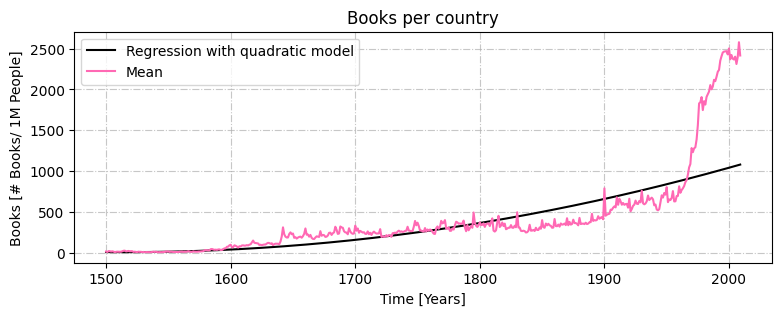

In [35]:
# Plot
plt.figure(figsize=(9,3))

plt.title('Books per country')
plt.xlabel('Time [Years]')
plt.ylabel('Books [# Books/ 1M People]')

plt.plot(year_array_2, fit_array, color = 'k', label = 'Regression with quadratic model')

# Mean and stv
plt.plot(year_array, mean_array, color = 'hotpink', label = 'Mean')

plt.grid(linestyle = '-.', alpha = 0.7)

plt.legend()
#plt.xlim(1800, 2009)
plt.show()
plt.close()